In [2]:
# importing lybaries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# import data sets

path = r'/Users/lennartzeidler/Desktop/Uni/Instacart Basket Analysis 08.10.2022 (4)'

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_merged_sale_analysis.pkl'))

### Bar Charts

In [5]:
ords_prods_merge.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range,busiest_day,busiest_days,busiest_hours,max_order,loyalty_flag,avg_spended,avg_price_flag,mean_order_frequency,order_frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly busy,Regulary busy days,Regulary busy hours,10,New customer,6.367797,Low spender,20.5,Regular customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Slowest days,Regulary busy hours,10,New customer,6.367797,Low spender,20.5,Regular customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Slowest days,Busiest hours,10,New customer,6.367797,Low spender,20.5,Regular customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Slowest days,Regulary busy hours,10,New customer,6.367797,Low spender,20.5,Regular customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Slowest days,Busiest hours,10,New customer,6.367797,Low spender,20.5,Regular customer


<AxesSubplot:>

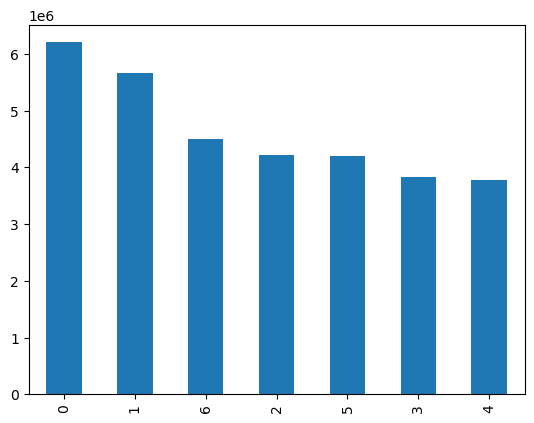

In [6]:
ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

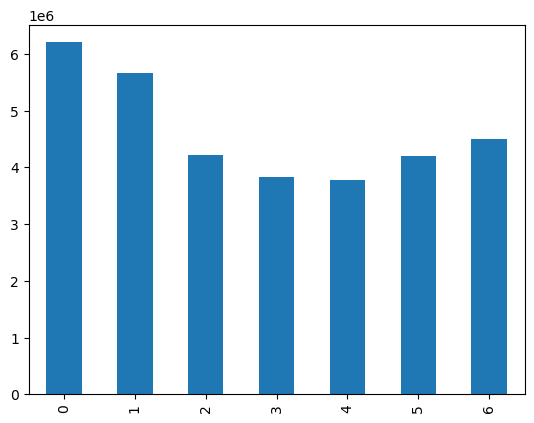

In [8]:
bar = ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

In [10]:
# export Histogram as png
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### Histogarms

<AxesSubplot:ylabel='Frequency'>

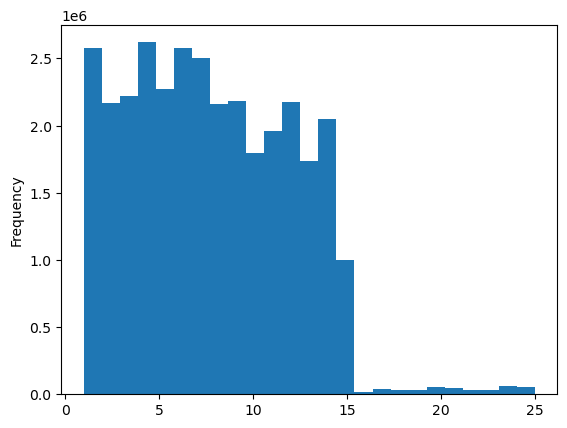

In [11]:
ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

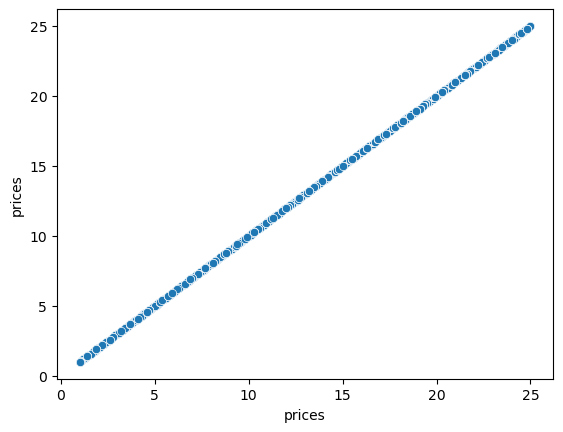

In [12]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

Following the instructions of the course ther are odd values within this dataset. Whatever I already checked for those values while cleaning the data set. That is why I can't go on with the following step but it has the same result.  

==> This would be the code to mark rows as null/missing  
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan 

<AxesSubplot:ylabel='Frequency'>

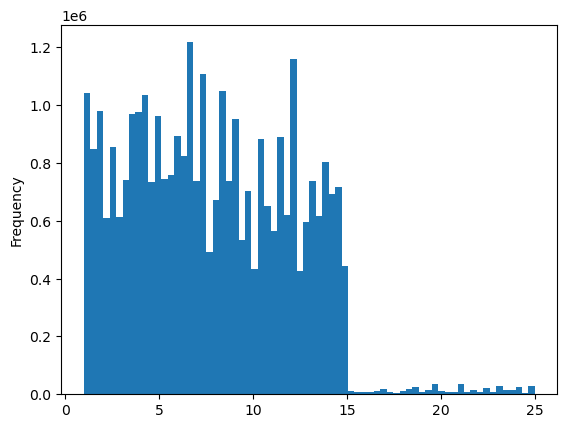

In [13]:
ords_prods_merge['prices'].plot.hist(bins = 70)

In [14]:
# export Histogram as png
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prod_prices.png'))

### Sampling Data

In [15]:
# setting seed and create list of boolean
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [20]:
dev

array([False,  True, False, ..., False,  True,  True])

In [21]:
# splitting df into 70% ==> big and 30% ==> small
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [23]:
len(big) + len(small) == len(ords_prods_merge)

True

In [25]:
price_orders = small[['order_day_of_week','prices']]

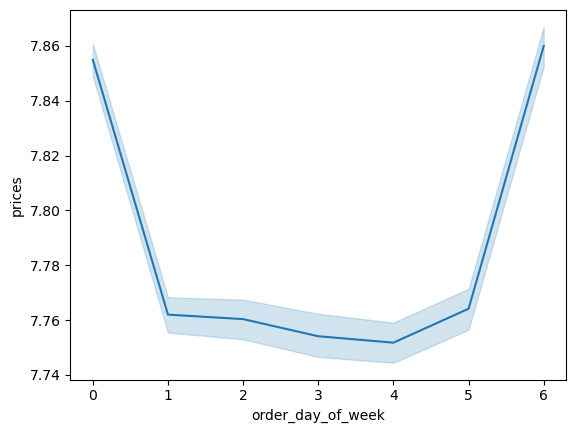

In [28]:
line = sns.lineplot(data = price_orders, x = 'order_day_of_week',y = 'prices')

In [29]:
ords_prods_merge.shape

(32399732, 22)

In [30]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices-ord_day_of_week.png'))